In [1]:
## Acknowledgement https://github.com/IRkernel/IRkernel
## jupyter notebook --kernel=ir
# Load library
library(KRASdep)

In [2]:
# read data
input <- read.csv("compass/compassLogExprMat.csv", header=T, row.names=1, stringsAsFactor=F)
dim(input)
head(input[,c(1:5)])

[1] 58684   114

,PCSI_0612,PCSI_0630,PCSI_0632,PCSI_0634,PCSI_0637
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L1,1.737215,1.2701340,1.3778900,0.5032744,0.4430411
RP11-34P13.3,0.000000,0.0000000,0.0000000,0.0000000,0.0000000
MIR1302-2,0.000000,0.0000000,0.0000000,0.0000000,0.0000000
WASH7P,7.175904,6.5154850,7.4423460,5.7403500,6.1773600
MIR6859-1,0.000000,0.0000000,0.0000000,0.0000000,0.0000000
FAM138A,0.000000,0.2337457,0.0294936,0.0000000,0.0000000


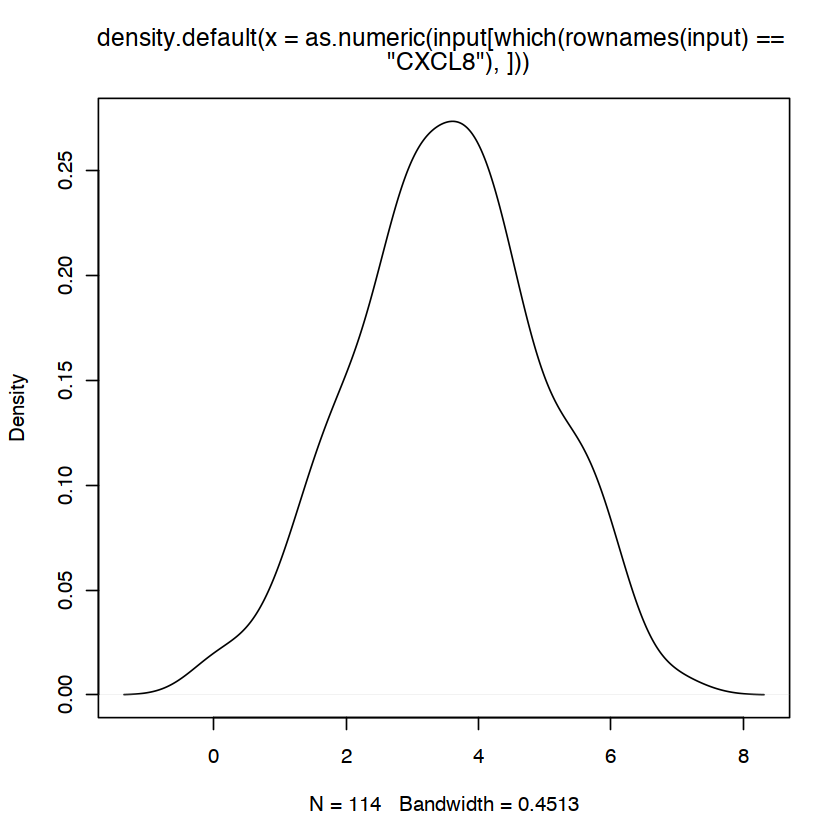

In [3]:
# check unit and density
plot(density(as.numeric(input[which(rownames(input) == "CXCL8"),])))

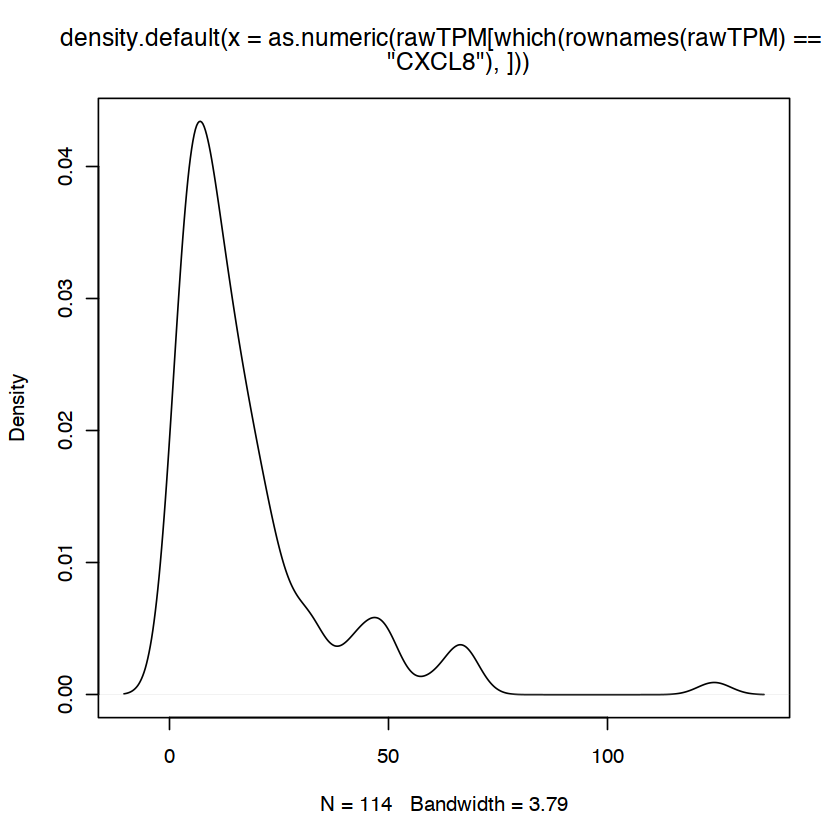

In [4]:
# transformation
rawTPM <- 2^input
plot(density(as.numeric(rawTPM[which(rownames(rawTPM) == "CXCL8"),])))

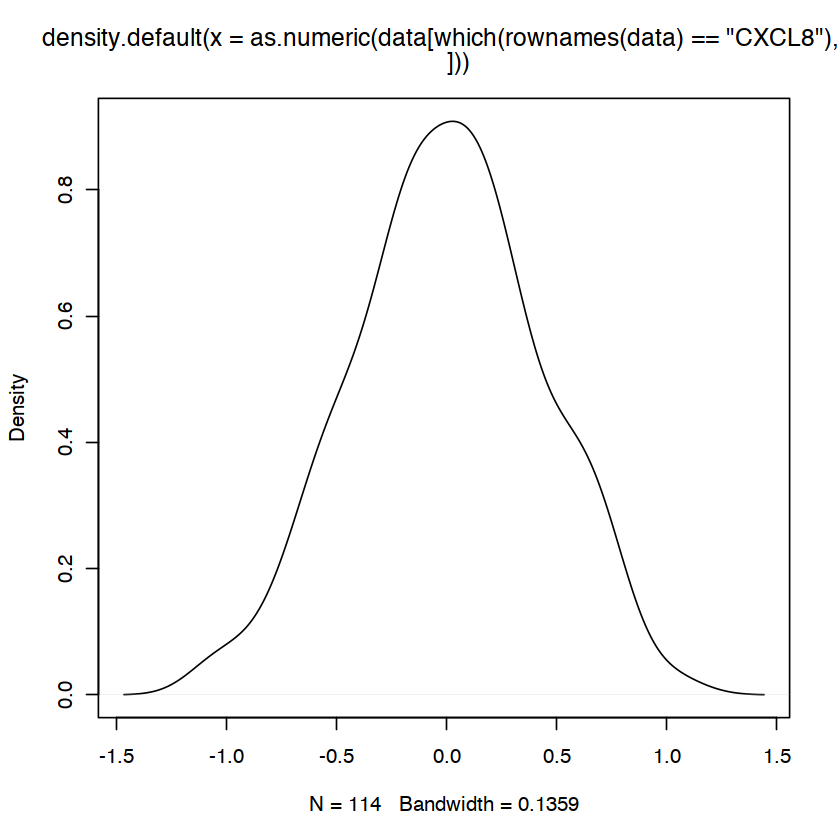

In [5]:
data <- transExp(rawTPM)
plot(density(as.numeric(data[which(rownames(data) == "CXCL8"),])))

In [8]:
rownames(data)[which(rownames(data) == "KDF1")] <- "C1orf172"
rownames(data)[which(rownames(data) == "ADGRF4")] <- "GPR115"
rownames(data)[which(rownames(data) == "AOC1")] <- "ABP1"
rownames(data)[which(rownames(data) == "MIR4435-2HG")] <- "LOC541471"

results <- c()
for(idx in c(1:ncol(data))) {
	dat <- as.vector(data[,idx])
	names(dat) <- rownames(data)
	lscore <- calcLScore(dat)
	sscore <- calcSScore(dat)
	res <- c(colnames(data)[idx], lscore, sscore)
	results <- rbind(results, res)
}
colnames(results) <- c("Sample", "L-score", "S-score")
head(results)

,Sample,L-score,S-score
res,PCSI_0612,0.00164607028665169,0.00474272603338124
res,PCSI_0630,0.167280399313821,0.0297749855769608
res,PCSI_0632,-0.266720671777852,-0.306340684622762
res,PCSI_0634,0.0458493718393673,0.0572356039378675
res,PCSI_0637,0.0679047568182007,0.147276734743027
res,PCSI_0640,0.00990995172724153,-0.0423779334122389


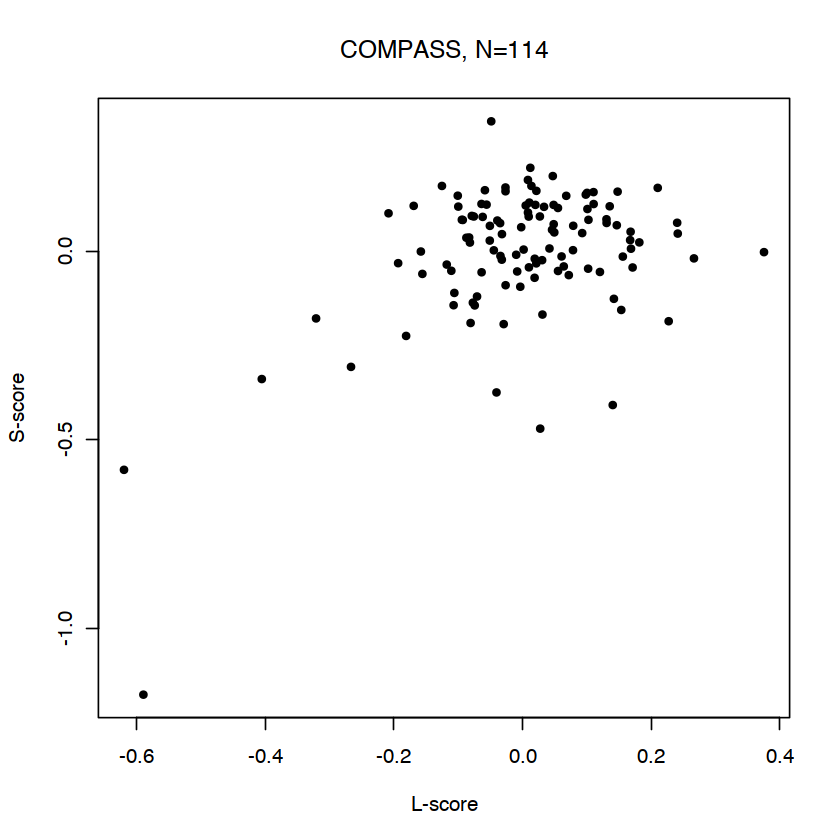

In [9]:
plot(as.numeric(results[,2]), as.numeric(results[,3]), pch=20, 
     xlab="L-score", ylab="S-score", 
     main=paste0("COMPASS, N=", nrow(results)))